## Introduction to Matplotlib

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [20]:
# Hiển thị style các đồ thị visualize
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [62]:
# Chọn style đồ thị visualize
plt.style.use('seaborn-whitegrid')

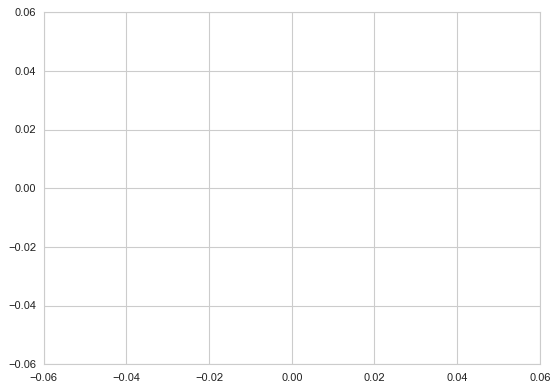

In [63]:
plt.plot(); # Có ; để không hiện dòng Output: ...

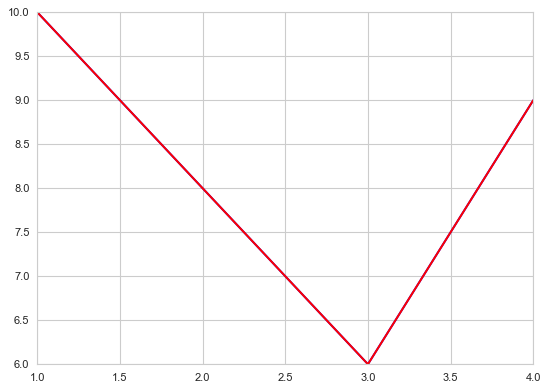

In [64]:
x = [1, 2, 3, 4]
y = [10, 8, 6, 9]
plt.plot(x, y)
# Hoặc đổi màu đồ thị
plt.plot(x, y, color="red")

## 1. Two ways to plot Matplotlib: Pyplot API vs Object-Oriented (OO) API
* Pyplot API -> Quickly
* OO API -> Advanced, vẽ đồ thị phức tạp hơn với nhiều tùy chỉnh

### Pyplot API

In [4]:
x = np.linspace(0, 10, 2000)
print(x)

[0.00000000e+00 5.00250125e-03 1.00050025e-02 ... 9.98999500e+00
 9.99499750e+00 1.00000000e+01]


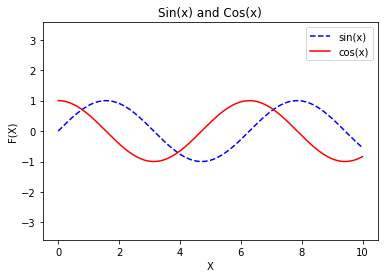

In [7]:
# Thử show dữ liệu
plt.plot(x, np.sin(x), color="blue", label="sin(x)", linestyle="dashed");
# dashed: đường nét đứt

# Vẽ thêm một đồ thị nữa cùng trong hình này và label nhận diện cái nào là đồ thị hàm nào.
plt.plot(x, np.cos(x), color="red", label="cos(x)") # cần khai báo thêm legend() phía cuối.

# Thêm thắt cho đồ thị đẹp hơn:
plt.title("Sin(x) and Cos(x)") # đặt tên cho toàn đồ thị
plt.xlabel("X")
plt.ylabel("F(X)")

# Giới hạn khoảng cần xem của đồ thị
# plt.xlim([0,4])
# plt.ylim([-0.75,1])
# hoặc sử dụng plt.axis([xmin, xmax, ymin, ymax]) cũng cho kqua tương tự.
# plt.axis([0, 4, -0.75, 1])
# ngoài ra:
# plt.axis("tight")
plt.axis("equal") # cho trục x bằng trục y

plt.legend(); # mention, hiện các label của các đồ thị con tương ứng.
plt.show(); # không cần thiết trong jupyter notebook, cần trong terminal hoặc py script.

### Object-Oriented API

[Text(0.5, 1.0, 'A simple plot'),
 Text(0.5, 0, 'x-axis'),
 Text(0, 0.5, 'y-axis')]

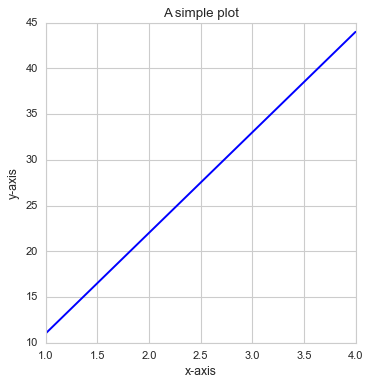

In [86]:
#1. prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

#2. Setup plot
# Figure size = width & height of the plot, kích thước 1 ô lưới, quyết định độ zoom của đồ thị
fig, ax = plt.subplots(figsize=(5, 5)) # fig là hình tổng, ax là các ô nhỏ, dùng ax để vẽ đồ thị như mã dưới đây.

#3. Plot the data
ax.plot(x, y)

#4. Style
ax.set(title="A simple plot", xlabel="x-axis", ylabel="y-axis")


## 2. Most common types of Matplotlib plots
* line
* scatter
* bar
* hist
* subplot(): 1 figure gồm rất nhiều subplot trong đó.
### Line

In [89]:
# Create an array
x = np.linspace(0, 10, 100)
x[:5] # xem 5 số đầu.

array([0.       , 0.1010101, 0.2020202, 0.3030303, 0.4040404])

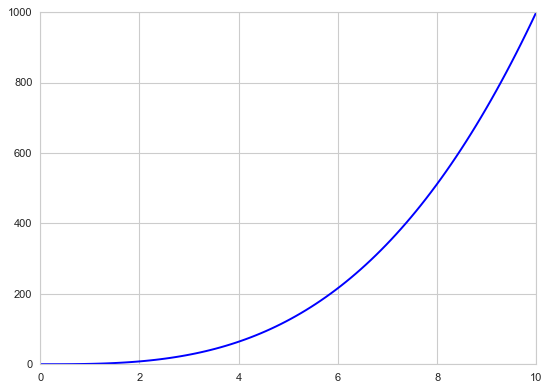

In [90]:
# Use OO-API to plot a line chart
fig, ax = plt.subplots()
ax.plot(x, x**3)

### Scatter: Biểu đồ phân tán

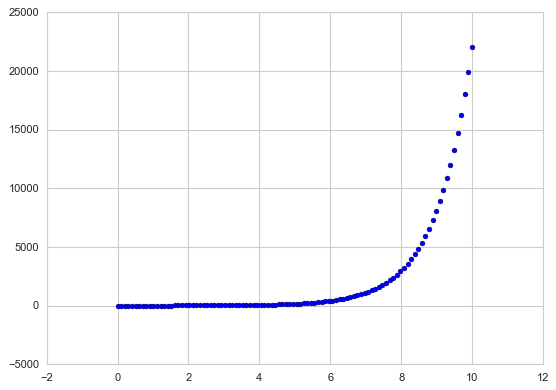

In [94]:
# Use Pyplot API to draw scatter chart
plt.scatter(x, np.exp(x))

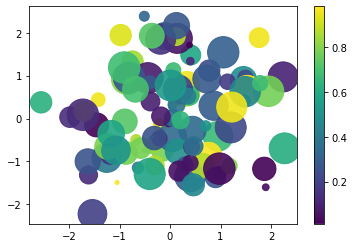

In [5]:
# Use OO-API to draw scatter chart

# prepare New Data to draw
rng = np.random.RandomState(0)

x = rng.randn(100)
y = rng.randn(100)

colors = rng.rand(100) # tùy chỉnh màu
sizes = 1000*rng.rand(100) # tùy chỉnh kích thước điểm (x, y)

# plot data by OO-API
fig, ax = plt.subplots()
# ax.scatter(x, y); # draw part 1
chart1 = ax.scatter(x, y, s=sizes, c=colors, cmap='viridis', alpha=0.9)
# alpha giúp chỉnh độ trong suốt
# cmap giúp chỉnh màu cho đỡ ngu

# Ngoài ra tạo thêm thanh colorbar để xem với màu này thì tương ứng với mức độ nào
fig.colorbar(chart1);

### 3. Bar chart
* Vertical
* Horizontal

[Text(0.5, 1.0, "Bach Hoa Xanh's Soft Drink Prices"),
 Text(0, 0.5, 'Price ($)')]

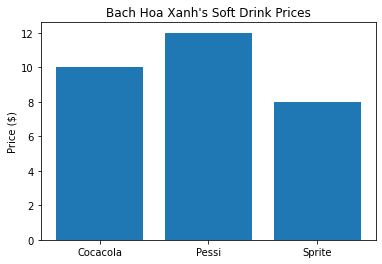

In [12]:
# Prepare Data from a python dictionary
soft_drink_prices = {"Cocacola": 10,
                    "Pessi": 12,
                    "Sprite": 8}
fig, ax = plt.subplots()
ax.bar(soft_drink_prices.keys(), soft_drink_prices.values())
ax.set(title="Bach Hoa Xanh's Soft Drink Prices", ylabel="Price ($)")

<BarContainer object of 3 artists>

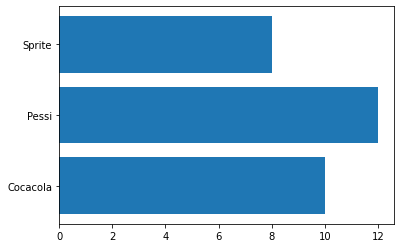

In [13]:
fig, ax = plt.subplots()
# Vẽ cột ngang: barh-> bar horizontal, barh function nhận đầu vào là list.
ax.barh(list(soft_drink_prices.keys()), list(soft_drink_prices.values()))

### 4. Histogram: Biểu đồ tần suất dạng cột

In [20]:
# Prepare data
np.random.seed(42)
# phân phối normal(gtri trung bình, độ lệch chuẩn, số lượng random)
student_height = np.random.normal(170, 10, 250)
student_height[:10], len(student_height)

# Không biết có bao nhiêu bạn trên 170cm ?

(array([174.96714153, 168.61735699, 176.47688538, 185.23029856,
        167.65846625, 167.65863043, 185.79212816, 177.67434729,
        165.30525614, 175.42560044]),
 250)

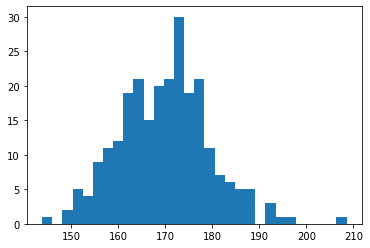

In [23]:
#pyplot API

plt.hist(student_height, bins=30); # bins để chia nhỏ khoảng trên trục x

### Subplots: Cách vẽ nhiều đồ thị trên cùng 1 figure object (fig - Hình). Dùng OO-API
* Multiple plots on one figure: https://matplotlib.org/3.1.1/gallery/recipes/create_subplots.html

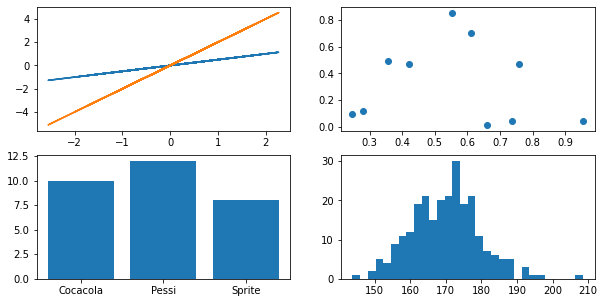

In [24]:
# Option 1:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                             ncols=2,
                                             figsize=(10, 5))
#Plot data to each axis
ax1.plot(x, x/2);
ax1.plot(x, x*2);

ax2.scatter(np.random.random(10),np.random.random(10));
ax3.bar(soft_drink_prices.keys(), soft_drink_prices.values());
ax4.hist(student_height, bins=30);

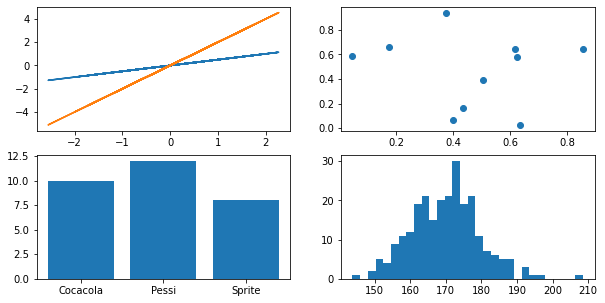

In [25]:
# Option 2:
fig, ax = plt.subplots(nrows=2,
                       ncols=2,
                       figsize=(10,5))
#Plot data to each axis
ax[0,0].plot(x, x/2);
ax[0,0].plot(x, x*2);

ax[0,1].scatter(np.random.random(10),np.random.random(10));
ax[1,0].bar(soft_drink_prices.keys(), soft_drink_prices.values());
ax[1,1].hist(student_height, bins=30);

### Project: Data Visualization - California Cities

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
cities = pd.read_csv('./data/california_cities.csv')
cities.head() # chạy thử

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
